In [1]:
# main.py
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from data_loader import DataLoader
from data_processing import DataProcessing
from visualization import DataVisualization
from sklearn.metrics import mean_squared_error


Общее кол-во пустых значений:  7829 

Распределение пустых значений по столбцам:

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Убираем пустые значения...

Общее кол-во пустых значений:  0 

Распределение пустых значений по столбцам:

Series([], dtype: int64)

Среднеквадратичная ошибка: 0.18
Коэффициент детерминации R^2: 0.84


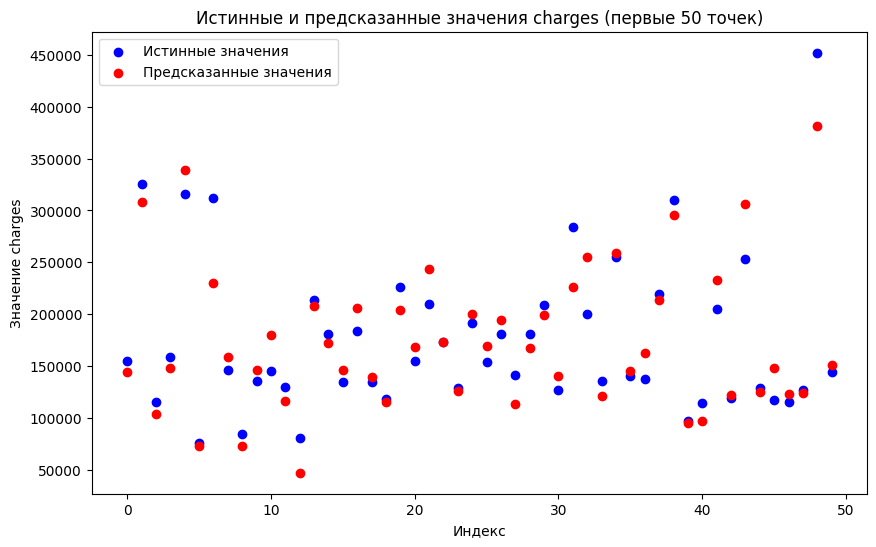

In [2]:
if __name__ == '__main__':
    # Загрузка данных
    cwd = os.getcwd()
    file_path = os.path.join(cwd, r'hw_2_data\train.csv')  # Замените на путь к вашему CSV файлу

    data = DataLoader.load_from_csv(file_path)

    # Print all columns with missing values and its counts

    print(f"Распределение пустых значений по столбцам:\n\n{DataProcessing.check_missing_values(data)}")
    print("\nУбираем пустые значения...")
    DataProcessing.fill_missing_values(data)
    print(f"Распределение пустых значений по столбцам:\n\n{DataProcessing.check_missing_values(data)}\n")

    # Предобработка данных
    target_column = 'SalePrice'

    X, y, preprocessor = DataProcessing.preprocess_data(data, target_column)

    # Разделение данных на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Обучение модели
    model = DataProcessing.train_model(X_train, y_train)

    # Предсказание на тестовых данных
    y_pred = DataProcessing.predict(model, X_test)

    # Оценка модели
    rmse, r2 = DataProcessing.evaluate_model(y_test, y_pred)

    print(f"Среднеквадратичная ошибка: {rmse / data['SalePrice'].mean():.2f}")
    print(f"Коэффициент детерминации R^2: {r2:.2f}")

    DataVisualization.plot_predictions(y_test, y_pred)